In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [2]:
from feature_engine.outliers import Winsorizer

In [3]:
df = sns.load_dataset('titanic').filter(['age', 'fare'])
print(df.shape)
df.head()

(891, 2)


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


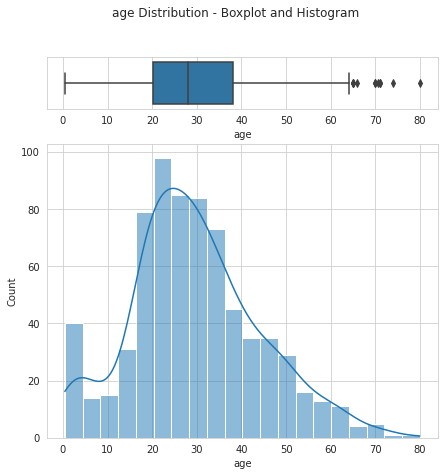

This is the range where a datapoint is not an outlier: from -6.69 to 64.81




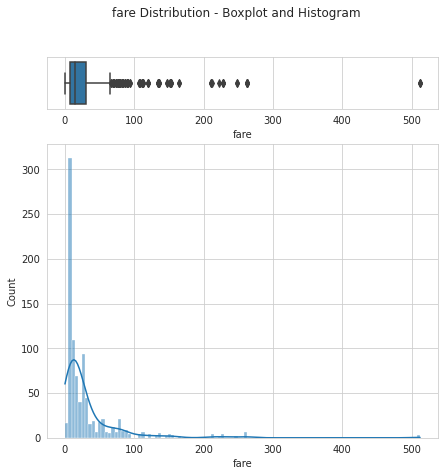

This is the range where a datapoint is not an outlier: from -26.72 to 65.63




In [4]:
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}")
    print("\n")

plot_histogram_and_boxplot(df)

In [5]:
from feature_engine.imputation import DropMissingData
pipeline = Pipeline([
      ( 'drop_na', DropMissingData() ),
      ( 'winsorizer_iqr', Winsorizer(capping_method='iqr', fold=1.5, tail='both', variables=['age', 'fare']) )
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [6]:
pipeline['winsorizer_iqr'].right_tail_caps_

{'age': 64.8125, 'fare': 71.3625}

In [7]:
pipeline['winsorizer_iqr'].left_tail_caps_

{'age': -6.6875, 'fare': -29.937499999999996}

========= Before Transformation ========= 



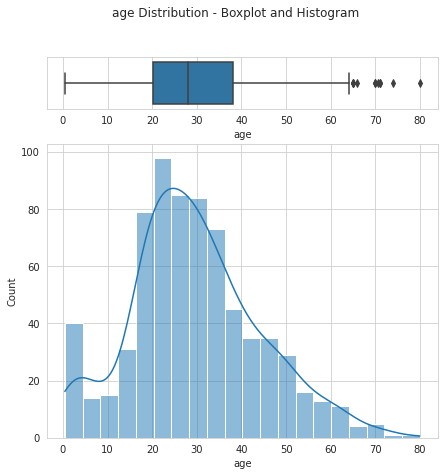

This is the range where a datapoint is not an outlier: from -6.69 to 64.81




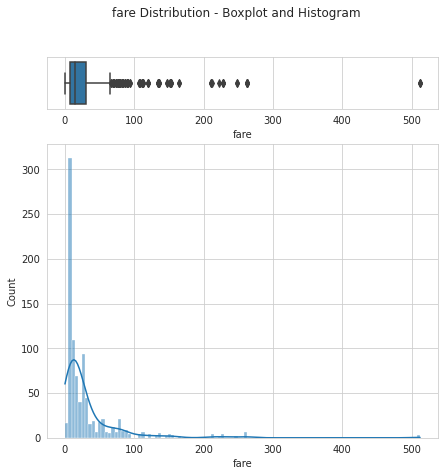

This is the range where a datapoint is not an outlier: from -26.72 to 65.63




 ========= After Transformation =========


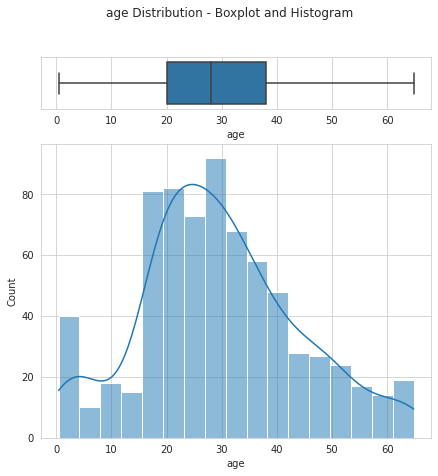

This is the range where a datapoint is not an outlier: from -6.69 to 64.81




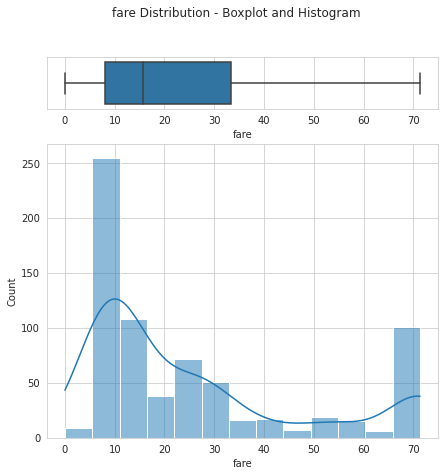

This is the range where a datapoint is not an outlier: from -29.94 to 71.36




In [8]:
print("========= Before Transformation ========= \n")
plot_histogram_and_boxplot(df)
print("\n\n ========= After Transformation =========")
plot_histogram_and_boxplot(df=df_transformed)

In [9]:
from feature_engine.outliers import ArbitraryOutlierCapper

In [10]:
from feature_engine.imputation import DropMissingData
pipeline = Pipeline([
      ( 'drop_na', DropMissingData() ),
      ( 'arb', ArbitraryOutlierCapper(max_capping_dict={'fare':40 , 'age':50}) )
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,age,fare
0,22.0,7.250
1,38.0,40.000
2,26.0,7.925
3,35.0,40.000
4,35.0,8.050


========= Before Transformation ========= 



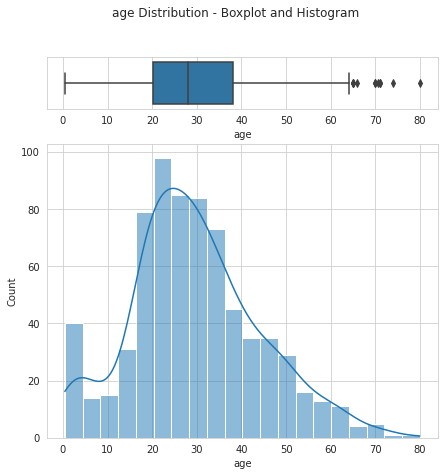

This is the range where a datapoint is not an outlier: from -6.69 to 64.81




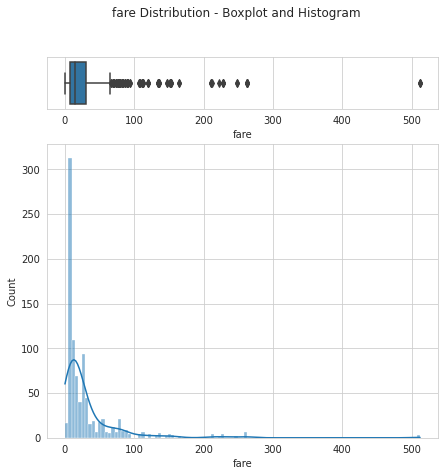

This is the range where a datapoint is not an outlier: from -26.72 to 65.63




 ========= After Transformation =========


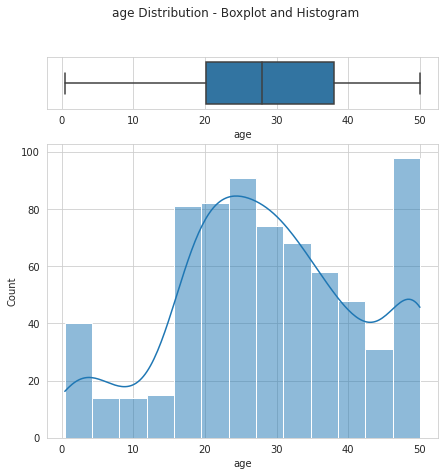

This is the range where a datapoint is not an outlier: from -6.69 to 64.81




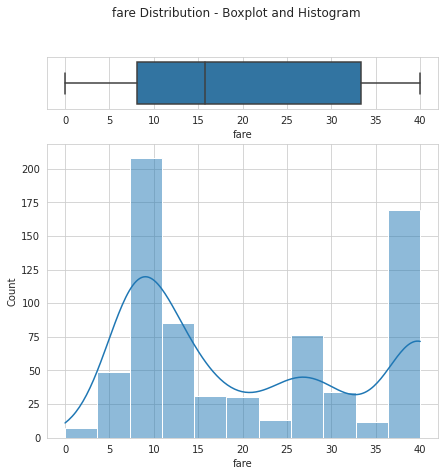

This is the range where a datapoint is not an outlier: from -29.94 to 71.36




In [11]:
print("========= Before Transformation ========= \n")
plot_histogram_and_boxplot(df)
print("\n\n ========= After Transformation =========")
plot_histogram_and_boxplot(df=df_transformed)

In [12]:
from feature_engine.outliers import OutlierTrimmer

In [13]:
df = sns.load_dataset('titanic').filter(['age', 'fare'])
print(df.shape)
df.head()

(891, 2)


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


* The dataset has 891 rows, considering outliers.




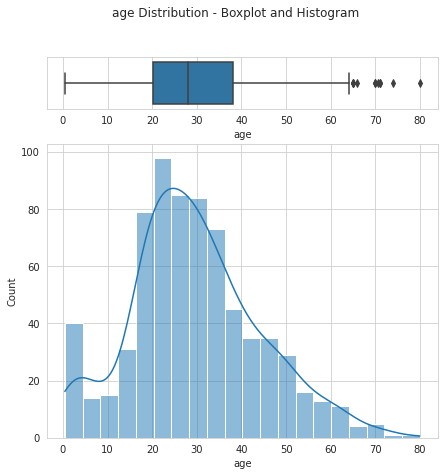

This is the range where a datapoint is not an outlier: from -6.69 to 64.81




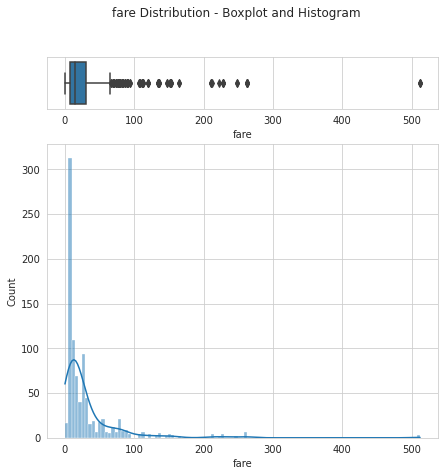

This is the range where a datapoint is not an outlier: from -26.72 to 65.63




In [15]:
print(f"* The dataset has {len(df)} rows, considering outliers.\n\n")
plot_histogram_and_boxplot(df)

In [16]:
from feature_engine.imputation import DropMissingData
pipeline = Pipeline([
      ( 'drop_na', DropMissingData() ),
      ( 'out_trimmer', OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both', variables=['age', 'fare']) )
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [17]:
print(f"* The dataset has {len(df)} rows, considering outliers.")
print(f"* Once it is transformed with OutlierTrimmer, dataset has {len(df_transformed)} rows")

* The dataset has 891 rows, considering outliers.
* Once it is transformed with OutlierTrimmer, dataset has 609 rows


========= Before Transformation ========= 



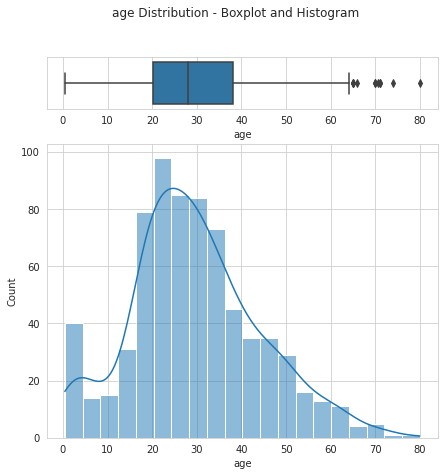

This is the range where a datapoint is not an outlier: from -6.69 to 64.81




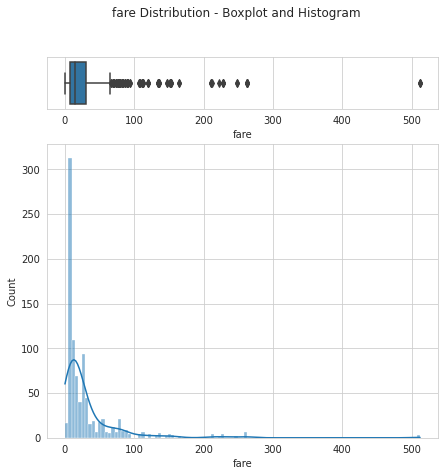

This is the range where a datapoint is not an outlier: from -26.72 to 65.63




 ========= After Transformation =========


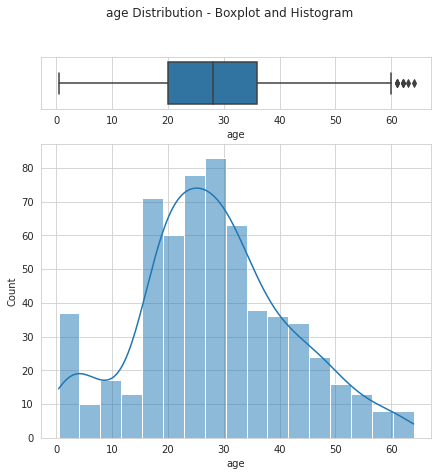

This is the range where a datapoint is not an outlier: from -4.0 to 60.0




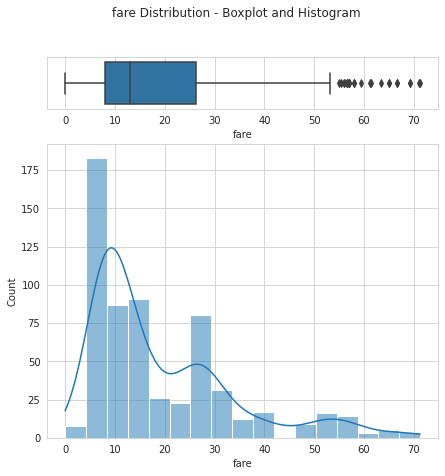

This is the range where a datapoint is not an outlier: from -19.56 to 53.74




In [18]:
print("========= Before Transformation ========= \n")
plot_histogram_and_boxplot(df)
print("\n\n ========= After Transformation =========")
plot_histogram_and_boxplot(df=df_transformed)